In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p13.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p21.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p4.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p15.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p2.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p6.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p5.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p11.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p17.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p1.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p14.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb_watermarked_p18.json
/kaggle/input/mmlu-watermarked/mmlu_run_results_OPT_350mb

In [2]:
import json
import glob

# Define the base path and file pattern
base_path = "/kaggle/input/mmlu-watermarked/"
file_pattern = "mmlu_run_results_OPT_350mb_watermarked_p*.json"

# Get all file paths
file_paths = glob.glob(base_path + file_pattern)
# Create an empty dictionary to store the merged data
merged_data = {}

# Iterate through all file paths
for file_path in file_paths:
    # Load data from each file
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Merge the data from each file
    for key, value in data.items():
        if key in merged_data:
            # If the key exists, merge the corresponding values
            merged_data[key]["pred_answers"] += value["pred_answers"]
            merged_data[key]["gold_answers"] += value["gold_answers"]
        else:
            # If the key doesn't exist, add it with the values
            merged_data[key] = value


with open('merged_MMLU_watermarked_results.json', 'w') as output_file:
    json.dump(merged_data, output_file,indent=4)

In [3]:
def evaluate_classification(df):

    # Evaluates a classification model using various metrics, reading data from a CSV file and creates a confusion matrix heatmap using seaborn.

    # df = pd.read_csv(file_path)

    # Extract true labels (assuming 'actual_label' column)
    y_true = df['gold_answers']

    # Extract predicted labels (assuming 'label' column)
    y_pred = df['pred_answers']


    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(y_true, y_pred, average='weighted')
      # Define custom labels for the confusion matrix
    # Print classification metrics (same as before)
    print(f"Accuracy: {accuracy * 100:.4f}")
    print(f"F1-score: {f1 * 100:.4f}")
    print(f"Precision: {precision * 100:.4f}")
    print(f"Recall: {recall * 100:.4f}")
    return accuracy, f1, precision, recall

# Specify the file path (assuming you're using Kaggle)
# file_path = "/kaggle/input/less-examples-of-hellaswag-eval-test-2/evaluation_OPT_350mb.csv"

# Evaluate the classification
# accuracy, f1, precision, recall = evaluate_classification(file_path)



In [4]:
def compute_metric(output_filename):
    with open(output_filename, 'r') as f:
        run_results = json.load(f)
    total_acc = 0
    total_num = 0
    combined_results = {}
    combined_results['pred_answers'] = []
    combined_results['gold_answers'] = []
    for task in run_results:
        acc = 0
        pred_answers = run_results[task]['pred_answers']
        combined_results['pred_answers'] = combined_results['pred_answers'] +run_results[task]['pred_answers']
        gold_answers = run_results[task]['gold_answers']
        combined_results['gold_answers'] = combined_results['gold_answers'] +run_results[task]['gold_answers']

        for pred, gold in zip(pred_answers, gold_answers):
            if pred == gold: acc += 1
        print("ACC-%s: %.4f" % (task, acc/len(gold_answers)))
        total_acc += acc
        total_num += len(gold_answers)
#     print("ACC-all: %.4f" % (total_acc/total_num))
    print()
    evaluate_classification(combined_results)


compute_metric('/kaggle/working/merged_MMLU_watermarked_results.json')

ACC-moral_scenarios: 0.2525
ACC-sociology: 0.2338
ACC-world_religions: 0.1988
ACC-elementary_mathematics: 0.2275
ACC-global_facts: 0.1800
ACC-high_school_chemistry: 0.2414
ACC-nutrition: 0.2582
ACC-philosophy: 0.1994
ACC-college_biology: 0.2639
ACC-college_chemistry: 0.1700
ACC-college_computer_science: 0.2400
ACC-college_mathematics: 0.2000
ACC-college_medicine: 0.2486
ACC-college_physics: 0.2353
ACC-high_school_computer_science: 0.2200
ACC-high_school_government_and_politics: 0.2850
ACC-high_school_macroeconomics: 0.2923
ACC-high_school_biology: 0.2710
ACC-high_school_european_history: 0.2000
ACC-high_school_geography: 0.3384
ACC-marketing: 0.2308
ACC-medical_genetics: 0.2400
ACC-moral_disputes: 0.2341
ACC-professional_law: 0.2347
ACC-abstract_algebra: 0.2500
ACC-anatomy: 0.2296
ACC-astronomy: 0.1711
ACC-business_ethics: 0.2400
ACC-clinical_knowledge: 0.2679
ACC-professional_psychology: 0.2271
ACC-computer_security: 0.2100
ACC-conceptual_physics: 0.3106
ACC-econometrics: 0.2193
ACC-e

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import pandas as pd

def transform_all_tasks(run_results):
    """
    Transforms all tasks in run_results dictionary to a single DataFrame.

    Args:
      run_results: Dictionary containing results for multiple tasks.

    Returns:
      pandas.DataFrame: DataFrame with columns 'task_name' (optional), 'prompt' (optional), 'prediction' and 'gold_label'.
    """
    data = []
    for task_name, task_results in run_results.items():
        # Check if 'prompt' key exists in task_results
        if 'prompt' in task_results:
            prompts = task_results['prompt']
            for i in range(len(prompts)):
                data.append({
                'task_name': task_name,
                'prompt': prompts[i],
                'prediction': task_results['pred_answers'][i],
                'gold_label': task_results['gold_answers'][i]
                })
        else:
            for i in range(len(task_results['pred_answers'])):
                data.append({
                'task_name': task_name,
                'prediction': task_results['pred_answers'][i],
                'gold_label': task_results['gold_answers'][i]
                })
    return pd.DataFrame(data)

# Transform all tasks in run_results to DataFrame
df = transform_all_tasks(merged_data)
# print(df)

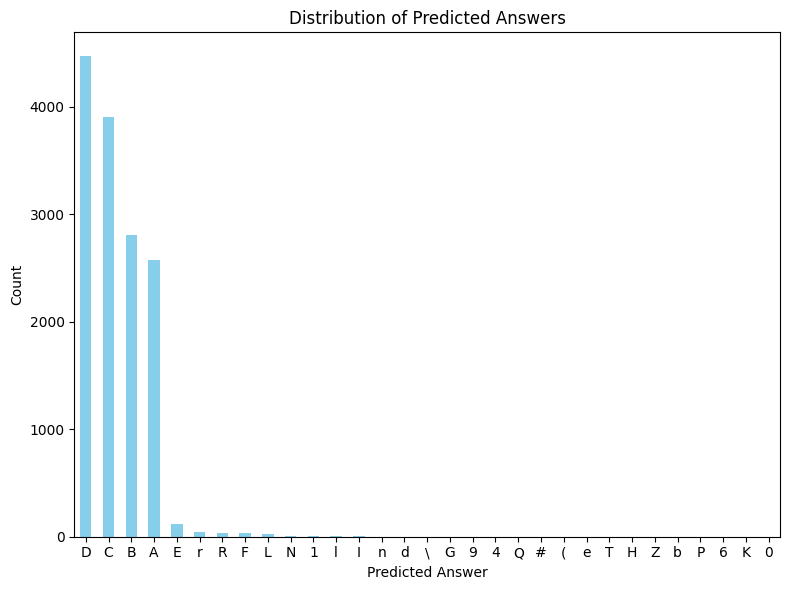

In [6]:
import matplotlib.pyplot as plt

def analyze_predictions(df):
    """
    Analyzes predicted answers from a CSV file and creates a bar chart.

    Args:
      filename: Path to the CSV file containing "predicted_answer" column.
    """

    # Count occurrences of each predicted answer
    answer_counts = df['prediction'].value_counts()

    # Create bar chart
    plt.figure(figsize=(8, 6))
    answer_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Predicted Answer')
    plt.ylabel('Count')
    plt.title('Distribution of Predicted Answers')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

analyze_predictions(df)